Blending CSTR

In [1]:
import scipy
import matplotlib.pyplot as plt
import numpy as np

In [124]:
# Starting Conditions

# Tank Specifications
VOLUME_TANK = 1000 # LITERS
DIAMETER = 10 #

Volume_base = 500 # L
Upper_Vol = 60 # L
Lower_Vol = 40 # L

BULK_A_FRAC_0 = 0.01 # mol A / mol
BULK_B_FRAC_0 = 0.01 # mol B / mol

# World Constants
GRAVITY = 9.81

# STREAM SPECIFICATIONS
Q_ONE_0 = 0.083 # L / s
Q_ONE_CA = 0.1 # mol / l
Q_ONE_CB = 0.01

Q_TWO_0 = 0.083 # L / s
Q_TWO_CA = 0.1
Q_TWO_CB = 0.01

Exit_Stream = 0.2 # L / s
EXIT_DIAMETER = 1 # m

In [125]:
def calculate_height(volume, diameter):
  volume_m3 = volume * 0.001
  height = volume / (np.pi * (diameter / 2) ** 2)

  return height

In [126]:
STARTING_HEIGHT = calculate_height(500, DIAMETER)
MAX_HEIGHT = calculate_height(1000, DIAMETER)

print("Starting Height: ", STARTING_HEIGHT)
print("Max Height: ", MAX_HEIGHT)

Starting Height:  6.366197723675813
Max Height:  12.732395447351626


In [139]:
def random_event():

  if np.random.randint(0, 100) > 50:
    return True
  else:
    return False
  
  return (1 + (np.random.randint(0, 100) / 100))

def Q1(t):
  return 1

def Q2(t):
  return 1

def Q3(t, V):
  return ((EXIT_DIAMETER / 2) ** 2) * np.pi * np.sqrt(2 * GRAVITY * calculate_height(V, DIAMETER))

def a1(t):
  return 0.1 * random_event()

def a2(t):
  return 0.1 * random_event()

def volume_balance(t, V):
  dvdt = Q1(t) + Q2(t) - Q3(t, V)
  return dvdt

def a_balance(t, V, A):
  dadt = Q1(t) * 1 + Q2(t) * 1 - Q3(t, V) * A
  return dadt

def coupled_system(t, x):
  dvdt = volume_balance(t, x[0])
  dadt = a_balance(t, x[0], x[1])
  return [dvdt, dadt]

In [140]:
sol = scipy.integrate.solve_ivp(coupled_system, [0,100], [Volume_base, BULK_A_FRAC_0])

In [141]:
sol

  message: The solver successfully reached the end of the integration interval.
  success: True
   status: 0
        t: [ 0.000e+00  7.774e-03 ...  9.911e+01  1.000e+02]
        y: [[ 5.000e+02  4.999e+02 ...  9.355e+01  9.196e+01]
            [ 1.000e-02  2.437e-02 ...  5.252e-01  5.296e-01]]
      sol: None
 t_events: None
 y_events: None
     nfev: 1232
     njev: 0
      nlu: 0

In [142]:
sol.y[1]

array([0.01      , 0.0243702 , 0.12176288, 0.1832874 , 0.2125151 ,
       0.22394911, 0.22767998, 0.22882605, 0.2294131 , 0.23002807,
       0.23060747, 0.23121804, 0.23183316, 0.23243255, 0.23302224,
       0.23364263, 0.23429789, 0.23494538, 0.23557642, 0.23618994,
       0.23681275, 0.23748585, 0.23816848, 0.23883282, 0.23947951,
       0.24011303, 0.24079072, 0.24150781, 0.2422085 , 0.2428918 ,
       0.24355233, 0.24422715, 0.24496866, 0.24571113, 0.24643121,
       0.24713194, 0.24781367, 0.24855963, 0.249347  , 0.25010674,
       0.25085068, 0.25156333, 0.2522982 , 0.25312069, 0.253929  ,
       0.25471312, 0.25547623, 0.25621068, 0.25703935, 0.25790595,
       0.2587317 , 0.25954721, 0.26031733, 0.26112269, 0.26204115,
       0.26292152, 0.26378058, 0.26461639, 0.26540811, 0.26633842,
       0.26729339, 0.2681939 , 0.26909528, 0.2699284 , 0.27092838,
       0.27186931, 0.27281106, 0.27370453, 0.27471002, 0.27568386,
       0.27665871, 0.27759113, 0.27862818, 0.27963911, 0.28065

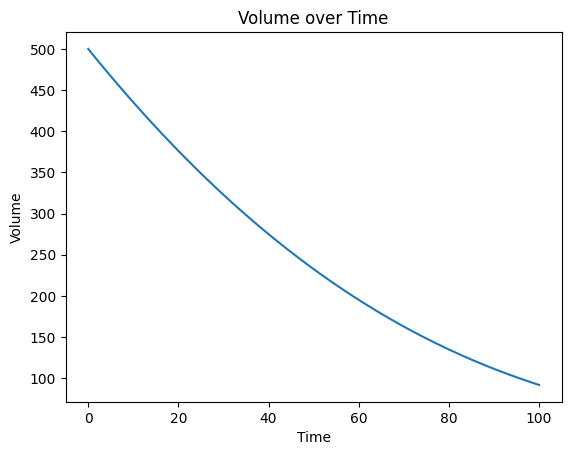

In [143]:
# plot

plt.plot(sol.t, sol.y[0])
plt.xlabel('Time')
plt.ylabel('Volume')
plt.title('Volume over Time')
plt.show()


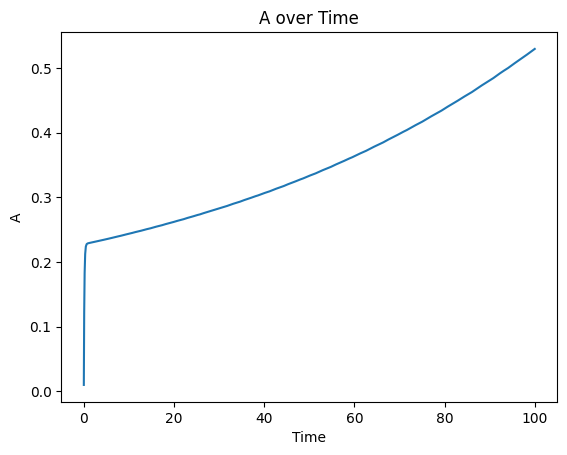

In [144]:
# plot

plt.plot(sol.t, sol.y[1])
plt.xlabel('Time')
plt.ylabel('A')
plt.title('A over Time')
plt.show()
